### **Case Study: Delivery Time Analysis for a Food Delivery App**

#### **Scenario:**

You work as a data scientist for a popular food delivery service in Nairobi. The company is trying to understand and improve its delivery times to enhance customer satisfaction. You’ve collected data from 2,000 past deliveries across different neighborhoods.

---

### **Objectives:**

#### 1. **Random Variables**

Let delivery time (in minutes) be the random variable `X`.

* Define `X` based on observed delivery times.
* For each delivery, `X_i` represents one observation.

#### 2. **Histogram and KDE**

* Plot a histogram and KDE of the delivery times to observe the distribution.
* Discuss whether the distribution is symmetric, skewed, or possibly normal.

#### 3. **Population vs Sample**

* Treat the 2,000 deliveries as the population.
* Take random samples of size 30, 100, and 500.
* Calculate sample means and compare them to the population mean.

#### 4. **Law of Large Numbers**

* Simulate multiple samples and show how the sample mean approaches the population mean as sample size increases.

#### 5. **Mean, Median, Expected Value**

* Compute the mean and median of the delivery times.
* Use the frequency of each unique delivery time to compute the expected value manually.

#### 6. **Variance, Covariance, Correlation**

* Introduce another variable: `distance_to_customer`.
* Compute the variance of both `delivery_time` and `distance`.
* Compute the covariance and correlation between them to check their relationship.

#### 7. **Central Limit Theorem**

* Create sampling distributions of the mean (e.g., draw 1,000 samples of size 30).
* Plot the sampling distribution and show how it approximates a normal distribution.

#### 8. **Normal Distribution**

* Fit a normal curve to the sampling distribution of means.
* Compare the actual sample mean distribution to the theoretical normal.

#### 9. **Standard Deviation**

* Discuss how standard deviation reflects spread in delivery time.
* Relate standard error of the sample mean to the population standard deviation.

---

### **Tools to Use:**

* **Pandas & NumPy** for calculations
* **Seaborn & Matplotlib** for histogram, KDE, and distribution plots
* **Scikit-learn (optional)** if you extend it with ML later


In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Declaration of the random variables and generation of data
# X is the list or array of all observed delivery times
np.random.seed(42)
X = np.random.normal(loc=30,scale=15,size=1000)


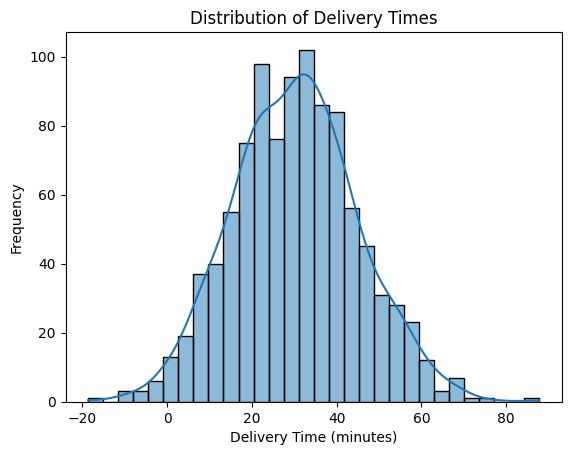

In [12]:
# Visualize the distribution of the delivery times using a histogram
sns.histplot(X, bins=30, kde=True, edgecolor="black")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Times")
plt.show()

In [4]:
# Treating the generated 1000 as the population. Take random samples of 30,100 and 500 from it, get sample mean and compare to the population mean
sample_30 = np.random.choice(X, size=30, replace=True).mean()
sample_100 = np.random.choice(X, size=100, replace=True).mean()
sample_500 = np.random.choice(X, size=500, replace=True).mean()
print(f"Population Mean: {X.mean()}")
print(f"Sample 30 Mean: {sample_30}")
print(f"Sample 100 Mean: {sample_100}")
print(f"Sample 500 Mean: {sample_500}")

Population Mean: 30.289980837334888
Sample 30 Mean: 28.349882051068867
Sample 100 Mean: 29.356109302087052
Sample 500 Mean: 30.182168504394784


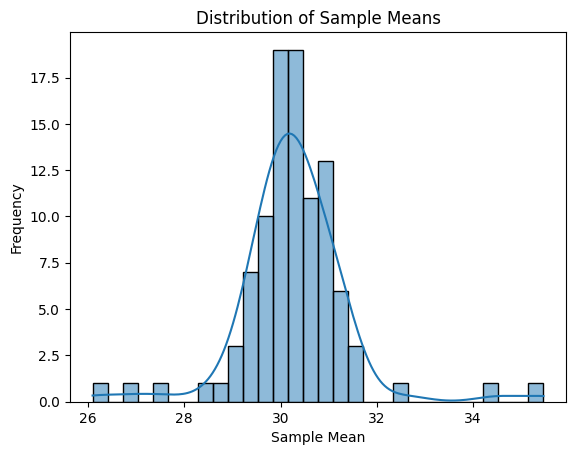

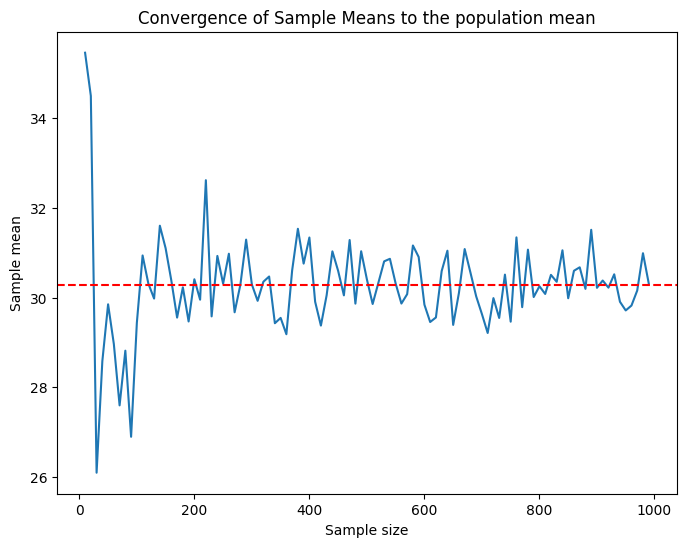

In [19]:
# simulate multiple samples as the number of n increases we'll see how the mean of the samples will approach the original population mean
samples = np.arange(10, 1000, 10)
sample_means = []
for n in samples:
    sample = np.random.choice(X, size=n, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

# Central limit theorem
sns.histplot(sample_means, bins=30, kde=True, edgecolor="black")
# sns.kdeplot(sample_means, color="red")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Means")
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(samples, sample_means)
plt.axhline(y=X.mean(), color='r', linestyle='--', label='Population Mean')
plt.xlabel("Sample size")
plt.ylabel("Sample mean")
plt.title("Convergence of Sample Means to the population mean")
plt.show()

In [6]:
# Mean and median of the delivery times X
mean = np.mean(X)
median = np.median(X)
print(f"Mean: {mean}")
print(f"Median: {median}")
# Calculate the expected value of delivery time using the frequency of each delivery time
# Calculate the frequency/probability of each unique delivery time
unique_times, counts = np.unique(X, return_counts=True)
frequencies = counts / len(X)

# Calculate the expected value manually
expected_value = np.sum(unique_times * frequencies)

print(f"Expected Value: {expected_value}")

Mean: 30.289980837334888
Median: 30.379509183523325
Expected Value: 30.289980837334884


In [10]:
 # Create a related distance array (e.g., longer times = longer distances)
# Let’s say distance (in km) = time * 0.3 + some noise
distance_to_customer = X * 0.3 + np.random.normal(scale=0.1, size=len(X))

# calculate the variance of both distance and delivery time
print(f"The variance of delivery time is: {np.var(X)}")
print(f"The variance of distance is: {np.var(distance_to_customer)}")

print(f"The covariance of delivery time and distance is: {np.cov(X, distance_to_customer)[0,1]}")
print(f"The correlation of delivery time and distance is: {np.corrcoef(X, distance_to_customer)[0,1]}")

The variance of delivery time is: 215.52862268959137
The variance of distance is: 19.419469213663827
The covariance of delivery time and distance is: 64.74346304413454
The correlation of delivery time and distance is: 0.999747344637073


In [ ]:
# Discuss how standard deviation reflects spread in delivery time.
# -The data had a standard deviation of 15 and a mean of 30, meaning that most of the delivery time is betweeen 15 minutes and 45 minutes(30 +- 15)
# Relate standard error of the sample mean to the population standard deviation.
# -SE quantifies how much the sample mean varies from sample to sample.
# -Can be used to answer the question of confidence
